# 0. Import

In [173]:
# Some imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

# Ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [174]:
DATA_DIR = "house-prices-advanced-regression-techniques/"
train_df = pd.read_csv(DATA_DIR + 'train.csv', index_col='Id')
test_df = pd.read_csv(DATA_DIR + 'test.csv', index_col='Id')
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [176]:
print(f"Train dataframe shape: {train_df.shape}")
print(f"Test dataframe shape: {test_df.shape}")

Train dataframe shape: (1460, 80)
Test dataframe shape: (1459, 79)


# 1. Analising and Transforming data

Most certainly, the price of a house depends on its square footage. Let's plot <b>'GrLivArea'</b> against 'SalePrice'.

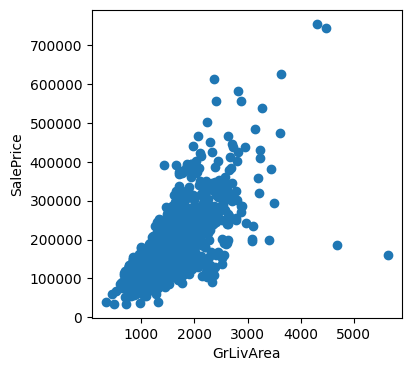

In [177]:
def plot_features(df, feature_x, feature_y):
    plt.figure(figsize=(4,4))
    plt.scatter(x=df[feature_x], y=df[feature_y])
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()
    
plot_features(train_df, 'GrLivArea', 'SalePrice')

There are a couple of examples for which the 'GrLivArea' is extremely large, but the 'SalePrice' is very small. We should delete these examples.

In [178]:
delete_rows = train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 200000)]
delete_rows

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Train dataframe shape after dropping: (1458, 80)


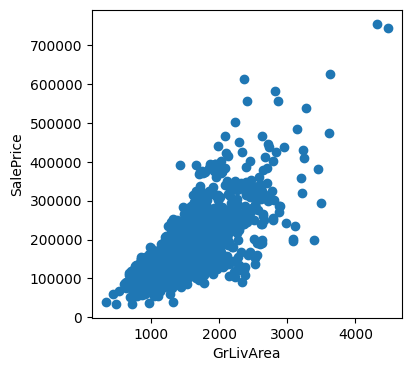

In [179]:
train_df.drop(index=delete_rows.index, inplace=True)
print(f'Train dataframe shape after dropping: {train_df.shape}')

plot_features(train_df, 'GrLivArea', 'SalePrice')

## 1.1 Plot the distribution of 'SalePrice'

### 1.1.1 Normal Distribution

Compare the distribution of our data to normal distribution.\
Ensuring that the target variable is approximately normally distributed can lead to more accurate predictions.

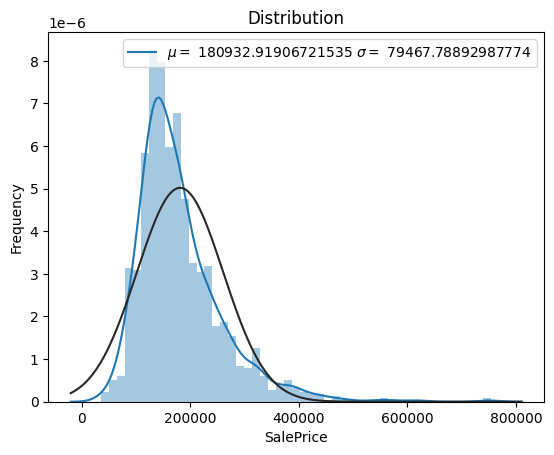

(180932.91906721535, 79467.78892987774)

In [180]:
def plot_normal_dist(df, feature):
    
    (mean, std) = norm.fit(df[feature])
    
    sns.distplot(df[feature] , fit=norm)
    
    plt.legend([f'$\mu=$ {mean} $\sigma=$ {std}'], loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribution')
    plt.show()
    return mean, std

plot_normal_dist(train_df, 'SalePrice')

#### 1.1.1.1 Quantile-Quantile Graph

To see if the data is normally distributed.\
Plots normal distribution quantiles against target feature quantiles.  If the data is normally distributed, most of the points will be on the line.

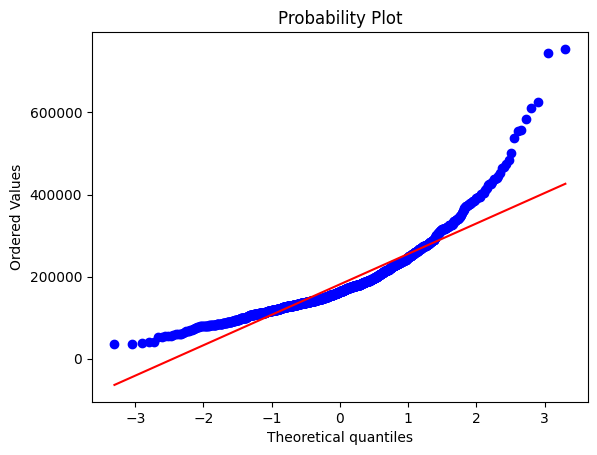

In [181]:
def plot_qq(df, feature):
    res = stats.probplot(df[feature], plot=plt)
    plt.show()
    return res
    
res = plot_qq(train_df, 'SalePrice')

## 1.2 Transforming 'SalePrice'

The target variable is <b>right skewed</b> - the long tail is on the right side.\
Let's transform the target variable to make it closer to the normal distribution. One common way to do this is <b>Log Transformation </b>

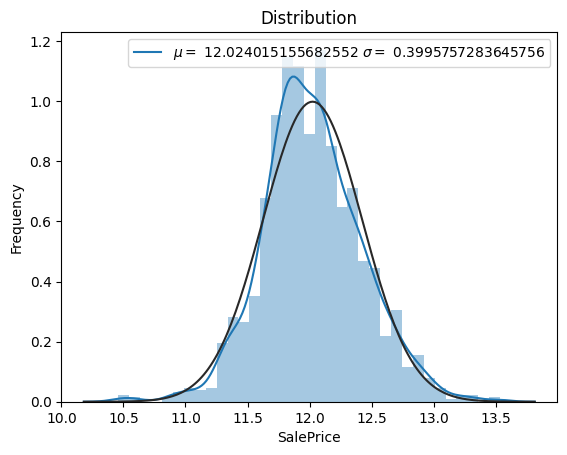

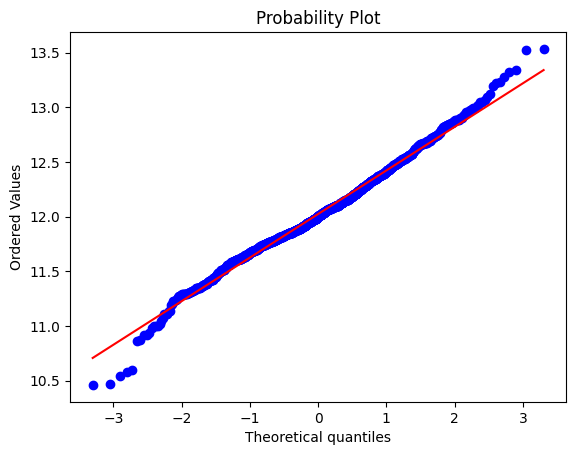

In [182]:
# apply log(1+x) to all elements of the target column
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

plot_normal_dist(train_df, 'SalePrice')
res = plot_qq(train_df, 'SalePrice')

We have successfully corrected the skew. The data seems to be more normally distributed.

# 2. Feature Engineering

Put all data in one dataframe

In [183]:
all_df = pd.concat([train_df.drop(columns=['SalePrice']), test_df]).reset_index(drop=True)
print(f'All data shape: {all_df.shape}')
all_df.head()

All data shape: (2917, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 2.1 Missing data 

In [184]:
# put missing features in a dataframe
missing_df = pd.DataFrame({'Ratio': all_df.isna().sum() / len(all_df)})
missing_df.drop(missing_df[missing_df['Ratio']==0].index, inplace=True)
missing_df.sort_values(by='Ratio', ascending=False, inplace=True)

print(f'Total number of missing features: {len(missing_df)}')
print(f'A list of missing features: {missing_df.index}')
missing_df.head(15)

Total number of missing features: 34
A list of missing features: Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageFinish', 'GarageQual', 'GarageCond',
       'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
       'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea', 'MSZoning',
       'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities', 'GarageArea',
       'GarageCars', 'Electrical', 'KitchenQual', 'TotalBsmtSF', 'BsmtUnfSF',
       'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType'],
      dtype='object')


,Ratio
PoolQC,0.996915
MiscFeature,0.964004
Alley,0.932122
Fence,0.804251
MasVnrType,0.605417
FireplaceQu,0.486802
LotFrontage,0.166610
GarageFinish,0.054508
GarageQual,0.054508
GarageCond,0.054508


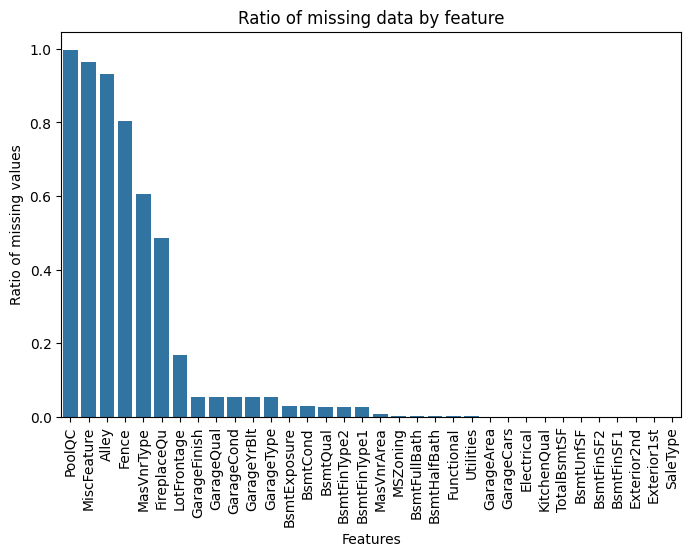

In [185]:
# plot missing data on bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_df['Ratio'].index, y=missing_df['Ratio'])
plt.xlabel('Features')
plt.xticks(rotation='vertical')
plt.ylabel('Ratio of missing values')
plt.title('Ratio of missing data by feature')
plt.show()

## 2.2 Correlation

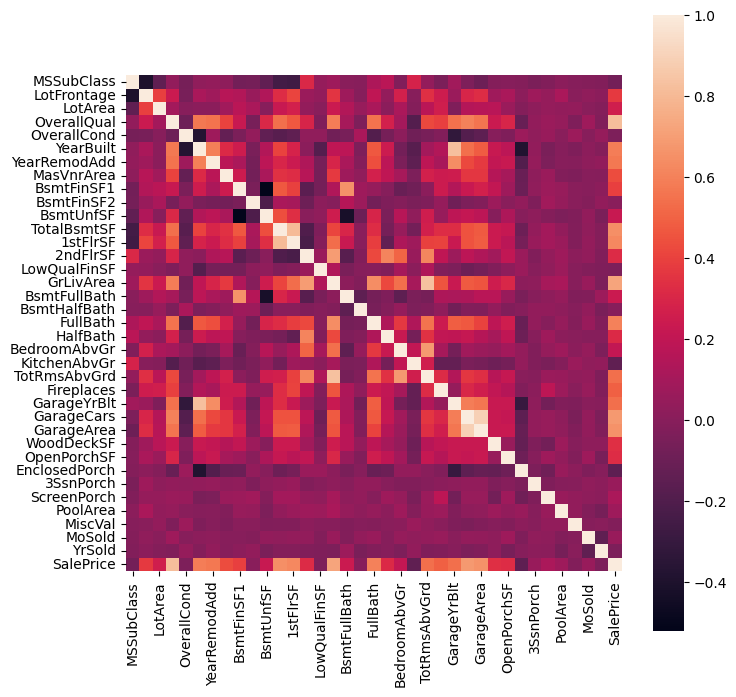

In [186]:
# plot correlation
plt.figure(figsize=(8,8))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, square=True)
plt.show()

## 2.3 Imputing missing values

### 2.3.1 PoolQC

In 'data-description.txt' it is stated that missing value of 'PoolQC' means that there is no pool. 

In [187]:
all_df['PoolQC'].fillna('None', inplace=True)

### 2.3.2 MiscFeature

Data description states that missing value means that there is no miscellaneous feature.

In [188]:
all_df['MiscFeature'].fillna('None', inplace=True)

### 2.3.3 Alley

Data description states that missing value means that there is no alley access.

In [189]:
all_df['Alley'].fillna('None', inplace=True)

### 2.3.4 Fence

Data description states that missing value means that there is no fence.

In [190]:
all_df['Fence'].fillna('None', inplace=True)

### 2.3.5 MasVnrType

Data description states that missing value means that there is no masonry veneer type.

In [191]:
all_df['MasVnrType'].fillna('None', inplace=True)

### 2.3.6 FireplaceQu

Data description states that missing value means that there is no fireplace.

In [192]:
all_df['FireplaceQu'].fillna('None', inplace=True)

### 2.3.7 LotFrontage

This feature describes the number of linear feet of street connected to property. This is most likely similar for all houses in a neighborhood. We can fill the missing values with the median of the LotFrontage of the neighborhood. 

In [193]:
all_df['LotFrontage'] = all_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### 2.3.8 GarageFinish, GarageQual, GarageCond, GarageType

Missing value means no garage.

In [194]:
for col in ('GarageFinish', 'GarageQual', 'GarageCond', 'GarageType'):
    all_df[col].fillna('None', inplace=True)

### 2.3.9 GarageYrBlt, GarageArea, GarageCars

Missing value means no garage. These features are numerical so we will replace the missing values with 0.

In [195]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_df[col].fillna(0, inplace=True)

### 2.3.10 BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2, BsmtFinType1

Missing value means that there is no basement.

In [196]:
for col in ('BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'):
    all_df[col].fillna('None', inplace=True)

### 2.3.11  BsmtFullBath, BsmtHalfBath, TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1

Missing value means that there is no basement, or that there is no unfinished area in basement, etc. We should replace the missing values with zeros. 

In [197]:
for col in ('BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1'):
    all_df[col].fillna(0, inplace=True)

### 2.3.12 MasVnrArea

Missing value means that there is zero square feet of masonry veneer area. Replace the missing values with 0.

In [198]:
all_df["MasVnrArea"].fillna(0, inplace=True)

### 2.3.13 MSZoning

In [199]:
all_df['MSZoning'].value_counts()

MSZoning
RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

There is no explicit definition of the meaning of the missing values. We will replace these values with the most common value. 

In [200]:
all_df['MSZoning'].fillna('RL', inplace=True)

### 2.3.14 Functional

Data description states that the missing values of 'Functional' mean 'Typ'.

In [201]:
all_df['Functional'].fillna('Typ', inplace=True)

### 2.3.15 Utilities

In [202]:
all_df['Utilities'].value_counts()

Utilities
AllPub    2914
NoSeWa       1
Name: count, dtype: int64

All utilities are 'AllPub' except one. We will drop of this feature.

In [203]:
all_df.drop(columns=['Utilities'], inplace=True)

### 2.3.16 Electrical

In [204]:
all_df['Electrical'].isna().sum()

1

Seems like the rest of the features with missing values have only one missing value. We will replace them with the means, unless it is explicitly defined in the data description file.

In [205]:
all_df.Electrical.value_counts()

Electrical
SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [206]:
all_df['Electrical'].fillna('SBrkr', inplace=True)

### 2.3.17 KitchenQual

In [207]:
all_df.KitchenQual.value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     203
Fa      70
Name: count, dtype: int64

In [208]:
all_df['KitchenQual'].fillna('TA', inplace=True)

### 2.3.18 Exterior1st and Exterior2nd

In [209]:
all_df.Exterior1st.value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [210]:
all_df.Exterior2nd.value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [211]:
all_df['Exterior1st'].fillna('VinylSd', inplace=True)
all_df['Exterior2nd'].fillna('VinylSd', inplace=True)

### 2.3.19 SaleType

In [212]:
all_df.SaleType.value_counts()

SaleType
WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [213]:
all_df.SaleType.fillna('WD', inplace=True)

Let's check if we have any more missing values.

In [214]:
print(f'Number of missing values after imputing: {all_df.isna().sum().sum()}')

Number of missing values after imputing: 0


## 2.4 Transforming Data

### 2.4.1 Transform features that appear to be numerical, but are actually categorical

In [215]:
# MSSubClass
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

# YrSold and MoSold can be treated as categorical
all_df['YrSold'] = all_df['YrSold'].astype(str)
all_df['MoSold'] = all_df['MoSold'].astype(str)

### 2.4.2 Label encodidng

In [216]:
from sklearn.preprocessing import LabelEncoder

cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
       'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
       'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
       'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', #'Neighborhood', 'MSZoning',
        'YrSold', 'MoSold']

# process columns, apply LabelEncoder to categorical features
for col in cols:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(all_df[col].values)) 
    all_df[col] = label_encoder.transform(list(all_df[col].values))

# shape        
print(f'Shape: {all_df.shape}')

Shape: (2917, 78)


In [217]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal


## 2.4.3 Adding 'TotalSF' feature

For this problem, a potentually usefull feature is square footage of an entire house. We will calculate this as a sum of 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'.

In [218]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']

In [219]:
# mszoning_median = train_df.groupby('MSZoning')['SalePrice'].median()
# neighborhood_median = train_df.groupby('Neighborhood')['SalePrice'].median()
# nbhd = pd.concat([train_df['Neighborhood'], test_df['Neighborhood']])
# mszon = pd.concat([train_df['MSZoning'], test_df['MSZoning']])
# all_df['MSZoningMdnPrice'] = mszon.map(neighborhood_median)
# all_df['NeighborhoodMdnPrice'] = nbhd.map(neighborhood_median)

# all_df['MSZoningMdnPrice'].fillna(mszoning_median.median(), inplace=True)
# all_df['NeighborhoodMdnPrice'].fillna(neighborhood_median.median(), inplace=True)

### 2.4.4 Fixing skewed features

In [220]:
numeric_cols = all_df.select_dtypes(exclude=['object']).apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :numeric_cols})
skewness.head(15)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


### 2.4.5 Box-Cox Transformation

We can apply the <b>Box-Cox</b> transformation to transform skewed features to a normal distribution and make patterns in the data more recognisable.
We will use <b>boxcox1p</b> from scipy.\
If $\lambda$ = 0 it will be the same as: $\log(y+1)$ \
Otherwise it's: $\frac{(y+1)^\lambda-1}{\lambda}$

In [221]:
from scipy.special import boxcox1p

skewness = skewness[abs(skewness) > 0.75] # apply only for data that has large skewness (>0.75)
skewed_cols = skewness.index
lmbda = 0.15

for col in skewed_cols:
    all_df[col] = boxcox1p(all_df[col], lmbda)

### 2.4.6 One-hot encoding

In [222]:
all_df = pd.get_dummies(all_df)
print(f'Shape after one-hot encoding: {all_df.shape}')

Shape after one-hot encoding: (2917, 220)


Split the data to train and test datasets

In [223]:
# all_df = all_df.drop(columns=['Neighborhood','MSZoning'])

# 3. Building a model

## 3.1 Define an evaluation

In [224]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = 5 # k = 5

def cv_rmsle(model): 
    train = all_df[:len(train_df)]
    test = all_df[len(train_df):]
    X_train = train
    y_train = train_df['SalePrice']
    kf = KFold(k_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    score = cross_val_score(
        model, train.values, y_train, cv=kf, scoring="neg_mean_squared_log_error")
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

## 3.2 Base models

Simple linear regression would not be the best choice because we have <b>a lot of features, some of which may not even be needed</b>, hence we will use regression models with <b>regularization</b>: 
- <b>Lasso</b> (uses L1 regularization)
- <b>Ridge</b> (uses L2 regularization) 
- <b>ElasticNet</b> (combines L1 and L2 regularization)\
These models perform better on scaled data and for that we will use the <b>RobustScaler</b>.

### 3.2.1 Lasso Regression

Lasso Regression uses <b>L1 regularization</b> - it penalises the model by: <b>$\lambda * (|w_1| + |w_2| +..., + |w_n|)$</b> \
This model <b>can totally eliminate a feature</b> if it decides that the feature not needed. \
We need to <b>corectly choose the parameter $\lambda$</b> (alpha in sklearn). We will test different values for the parameter.

In [225]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler

# best_score = 1

# for i in range (1, 100):
#     i*=0.0001
#     lasso = make_pipeline(RobustScaler(), Lasso(alpha = i, random_state=42))
#     score = cv_rmsle(lasso)
#     if score <= best_score:
#         best_score = score
#     else:
#         print(f'The best score is achieved with lambda={i-0.0001}: {best_score}')
#         break
#     print(f'Score with lambda={i}: {score}')

Build the final Lasso model (with the best value for $\lambda$):

In [226]:
from sklearn.pipeline import make_pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=42))
cv_rmsle(lasso)

0.008687039915065734

### 3.2.2 Ridge Regression

Ridge Regression uses <b>L2 regularization</b> - it penalises the model by: <b>$\lambda * (w_1^2 + w_2^2 +..., + w_n^2)$</b> \
This model <b>cannot totally eliminate a feature</b>\
We need to <b>corectly choose the parameter $\lambda$</b> (alpha in sklearn). We will test different values for the parameter.

In [227]:
from sklearn.linear_model import Ridge

# best_score = 1

# for i in range (1, 100):
#     ridge = make_pipeline(RobustScaler(), Ridge(alpha = i, random_state=42))
#     score = cv_rmsle(ridge)
#     if score <= best_score:
#         best_score = score
#     else:
#         print(f'The best score is achieved with lambda={i-1}: {best_score}')
#         break
#     print(f'Score with lambda={i}: {score}')

Build the final Ridge model (with the best value for $\lambda$):

In [110]:
from sklearn.pipeline import make_pipeline

ridge = make_pipeline(RobustScaler(), Ridge(alpha = 14, random_state=42))
cv_rmsle(ridge)

0.00887843485120309

### 3.2.2 ElasticNet

ElasticNet Regression uses <b>both L1 and L2 regularization</b> - it penalises the model by: <b>$\lambda_1 * (|w_1| + |w_2| +..., + |w_n|) + \lambda_2 * (w_1^2 + w_2^2 +..., + w_n^2)$</b> \
This model <b>does really well on correlated features</b>. \
We need to <b>corectly choose the l1_ratio</b> (ratio between l1 and l2 lambda). We will test different values for the parameter.

In [111]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler

# best_score = 1
# for i in range (85, 100):
#     i/=100
#     ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00055, l1_ratio=i, random_state=42))
#     score = cv_rmsle(ENet)
#     if score <= best_score:
#         best_score = score
#     else:
#         print(f'The best score is achieved with ratio={i-0.01}: {best_score}')
#         break
#     print(f'Score with lambda={i}: {score}')

Build the final ElasticNet model (with the best value for l1_ratio):

In [125]:
from sklearn.pipeline import make_pipeline

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00055, l1_ratio=0.89, random_state=42))
cv_rmsle(ENet)

0.008688431251101142

### 3.2.3 Kernel Ridge

Kernel Ridge combines <b>Ridge regression</b> (L2 regularization linear regression) with the <b>kernel trick</b>. \
Kernel trick defines how each point compares to each other datapoints after we apply the non-linear transformation. These equations are called <b>the kernel functions</b> (kernel in sklearn). We will use polynomial kernel function: $k(x,y) = (\gamma x^Ty +c_0)^d$ (in sklearn alpha is L2 regularization's $\lambda$, degree is $d$ and coef0 is $c_0$)

In [126]:
from sklearn.kernel_ridge import KernelRidge

# best_score = 1

# for d in range(12,21):
#     for c0 in range(15, 20):
#         for a in range(1,5):
#             a = (d/10) * a
#             c0 += ((d-10)/10) * 5 
#             KRR = KernelRidge(alpha=a/10, kernel='poly', degree=d/10, coef0=c0/10)
#             score = cv_rmsle(KRR)
#             print(f'Score with alpha={a/10}, degree={d/10} and coef0={c0/10} = {score}')
#             if score < best_score:
#                 best_score = score
#                 print(f'New best score: {best_score}')
            

In [127]:
KRR = KernelRidge(alpha=0.13999999999999999, kernel='polynomial', degree=1.4, coef0=1.7)
cv_rmsle(KRR)

0.008895253745695463

### 3.2.4 Gradient Boosted Regression

Next we will try some <b>Gradient Boosted</b> alghoritms. Gradient Boosted alghoritms work really good when it comes to complex datasets.

Firstly, we will try the basic Gradient Boosting Regressor. Using the <b>huber loss</b> makes it robust to outliers. Huber loss is a combination of mean squared error (MSE) and mean absolute error (MAE). It behaves like MSE for small errors and like MAE for large errors. We will loop through different values for n_estimators to find the best one.

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

# best_score=1

# for n_est in range(1000, 2100, 100):

#     print(f"Currently training a tree with n_estimators={n_est}")
#     GBoost = GradientBoostingRegressor(n_estimators=n_est, learning_rate=0.05,
#                            max_depth=2, max_features='sqrt',
#                            loss='huber', random_state=42, subsample=.8)
#     score = cv_rmsle(GBoost)
#     if score < best_score:
#         print(f"The tree with: n_estimators={n_est} is the current best with the score of: {score}")
#         best_score = score

# best_score

In [129]:
GBoost = GradientBoostingRegressor(n_estimators=1700, learning_rate=0.05,
                           max_depth=2, max_features='sqrt',
                           loss='huber', random_state=42, subsample=.8)
cv_rmsle(GBoost)

0.0087622473019403

### 3.2.5 XGBoost

In [130]:
from xgboost import XGBRegressor

# XGB = XGBRegressor(n_estimators=100, eta=0.05, max_depth=3, subsample=0.8, random_state=42)
# cv_rmsle(XGB)

In [131]:
# XGB = XGBRegressor(n_estimators=400, eta=0.05, max_depth=3, subsample=0.8, random_state=42)
# cv_rmsle(XGB)

In [132]:
# XGB = XGBRegressor(n_estimators=400, eta=0.05, max_depth=3, subsample=0.6, random_state=42)
# cv_rmsle(XGB)

In [133]:
# XGB = XGBRegressor(n_estimators=400, eta=0.05, max_depth=3, subsample=0.6, colsample_bytree=0.4, random_state=42)
# cv_rmsle(XGB)

In [134]:
XGB = XGBRegressor(n_estimators=1000, eta=0.02, max_depth=3, subsample=0.5, 
                   colsample_bytree=0.5, reg_alpha=.005, reg_lambda=1, min_child_weight=1,
                    random_state=42)
cv_rmsle(XGB)

0.008710719330484578

### 3.2.6 LightGBM

In [135]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(objective='regression', n_estimators=830, learning_rate =0.02, verbose=-1,
                     max_depth=4, 
                     num_leaves=13, min_data_in_leaf=5,
                     min_sum_hessian_in_leaf=5,
                     feature_fraction=0.235,
                     bagging_freq=9, bagging_fraction=0.8,
                     max_bin=110,
                     lambda_l1=.005, lambda_l2 =.005,
                     feature_fraction_seed=42, bagging_seed=42, max_iter=1100)
# LGBM = LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=42, bagging_seed=42,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
cv_rmsle(LGBM)

0.008732247120813452

### 3.2.7 Histogram-based Gradient Boosting Regression

In [136]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import loguniform
# from sklearn.ensemble import HistGradientBoostingRegressor

# hgb_params = {
#     'learning_rate': loguniform(0.01, 0.5),
#     'max_depth': [3, 4, 5, 6, 7],
#     'max_leaf_nodes': [10, 15, 30, 45, 60],
#     'max_bins': [40, 60, 80, 100, 150],
#     'max_iter': [100, 250, 500, 750, 1000, 1200],
#     'l2_regularization': [0.0005, 0.005, 0.05, 0.5]
# }

# search_cv = RandomizedSearchCV(
#     HistGradientBoostingRegressor(loss='gamma', random_state=42, max_features=.8),
#     param_distributions=hgb_params,
#     scoring="neg_mean_squared_log_error",
#     n_iter=300,
#     random_state=42,
#     n_jobs=-1,
#     verbose=4
# )

# search_cv.fit(train, train_df['SalePrice'])

In [138]:
# columns = [f"param_{name}" for name in hgb_params.keys()]
# columns += ["mean_test_error", "std_test_error"]
# cv_results = pd.DataFrame(search_cv.cv_results_)
# cv_results["mean_test_error"] = np.sqrt(-cv_results["mean_test_score"])
# cv_results["std_test_error"] = cv_results["std_test_score"]
# cv_results[columns].sort_values(by="mean_test_error").head()

In [139]:
# search_cv.best_params_

In [141]:
from sklearn.ensemble import HistGradientBoostingRegressor

HGB =  HistGradientBoostingRegressor(learning_rate=0.02241582866616425, max_bins=60,
                                     max_depth=3, max_iter=1200, max_leaf_nodes=15,
                                     loss='gamma', random_state=42, max_features=.8,
                                    l2_regularization=3)
cv_rmsle(HGB)

0.009306530317966626

## 3.3 Defining the final model


### 3.3.1 Building the model

We will build the final model by combining the base models into a Voting Regressor, and then into a Stacking Regressor.\
<b>Stacking regressor</b> stacks the output of individual estimator and uses a regressor to compute the final prediction. This allows the model to use the strength of each individual submodel by using their output as input of a final estimator. \
<b>Voting regressor</b> fits several base models, then it averages the individual predictions to form a final prediction.

In [142]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

voting_1 = VotingRegressor(estimators=[
    ('lasso', lasso),
    ('KRR', KRR),
    ('ENet', ENet),
], n_jobs=-1, weights=[.4, .3, .3])


stacking = StackingRegressor(estimators=[
    ('voting', voting_1),
    ('XGB', XGB),
    ('LGBM', LGBM),
    ('GBoost', GBoost),
    #('HGB', HGB)
])#weights=[.2, .3, .25, .1, .15])

cv_rmsle(stacking)

0.008355648920106313

### 3.3.2 Training the final model

In [234]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [228]:
train = all_df[:len(train_df)]
test = all_df[len(train_df):]
X_train = train
y_train = train_df['SalePrice']

stacking.fit(X_train.values, y_train)
stacking_train_preds = stacking.predict(train.values)
stacking_test_preds = np.expm1(stacking.predict(test.values))
print(f'RMSLE on train: {rmsle(y_train, stacking_train_preds)}')

RMSLE on train: 0.005698089508470894


In [235]:
rmsle(y_train, stacking_train_preds)

0.07310213694064566

### 3.3.3 Creating a submission file

In [229]:
submission = pd.DataFrame()
submission['Id'] = pd.read_csv(DATA_DIR + 'test.csv', usecols=['Id'])
submission['SalePrice'] = stacking_test_preds
submission.to_csv('submission.csv',index=False)